# **Artificial Neural Networks**

Name: Seanrei Ethan M. Valdeabella

Date: Februay 8, 2025

In [183]:
#@title # **Importing libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.18.0'

# **Part 1 - Data Preprocessing**

In [145]:
#@title Importing the dataset
dataset_name = "Churn_Modelling.csv" #@param {type:"string"}
dataset = pd.read_csv(dataset_name)

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [146]:
#@title Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Label Encoding the Gender Column (Female = 0, Male = 1)
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# One Hot Encoding the Geography Column (France = 100, Spain = 010, Germany = 001)
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough")
X = ct.fit_transform(X)

print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [147]:
#@title Splitting the dataset into the Training Set and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [148]:
#@title Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Part 2 - Building the ANN**

In [149]:
#@title Initializing the ANN
ann = tf.keras.models.Sequential()

In [150]:
#@title Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

In [151]:
#@title Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

In [152]:
#@title Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# **Part 3 - Training the ANN**



In [153]:
#@title Compiling the ANN
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [154]:
#@title Training the ANN on the Training Set
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5355 - loss: 0.7329
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 0.4666
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7988 - loss: 0.4507
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8075 - loss: 0.4334
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8045 - loss: 0.4286
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8202 - loss: 0.4172
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8123 - loss: 0.4200
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8093 - loss: 0.4209
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8215 - loss: 0.3938
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8279 - loss: 0.3936
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8307 - loss: 0.3936
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

# **Part 4 - Making the predictions and evaluating the model**

In [181]:
#@title Predicting the result of a single observation


geography = "France"  #@param {type:"string"}
cred_score = 600  #@param {type:"number"}
gender = "Male"  #@param ["Female", "Male"]
age = 40  #@param {type:"number"}
tenure = 3  #@param {type:"number"}
balance = 60000  #@param {type:"number"}
num_of_products = 2  #@param {type:"number"}
have_cred_card = 1  #@param [0, 1]
is_active_member = 1  #@param [0, 1]
est_salary = 50000  #@param {type:"number"}

geography_encoded = 1, 0 ,0
gender_encoded = le.transform([gender])[0]

prediction = ann.predict(sc.transform([[1, 0, 0, cred_score, gender_encoded, age, tenure, balance,
                          num_of_products, have_cred_card, is_active_member,
                          est_salary]]))

print(f"Chance to leave the bank: {prediction[0][0]}")
print(f"The customer will leave the bank: {prediction[0][0] > 0.5}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Chance to leave the bank: 0.0423085056245327
The customer will leave the bank: False


In [187]:
#@title Predicting the Test Set results
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.5
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Accuracy: 0.859


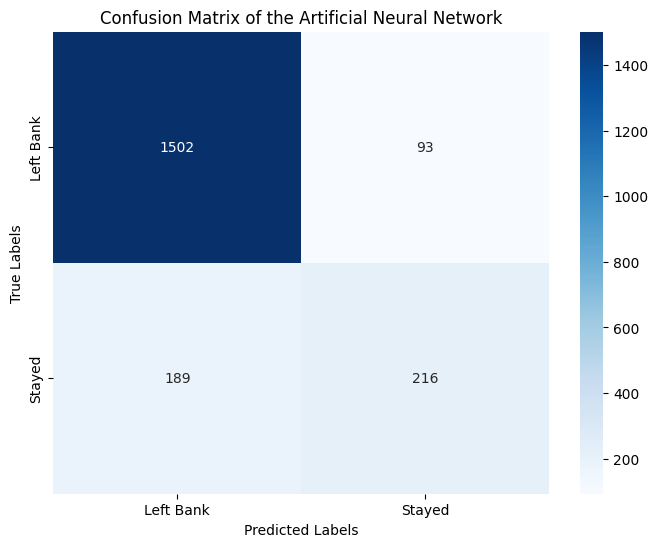

In [193]:
#@title Making the Congusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
acs = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acs}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Left Bank', 'Stayed'], yticklabels=['Left Bank', 'Stayed'])
plt.title("Confusion Matrix of the Artificial Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()